Import pandas and the course dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("courses.csv")
data.head()

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,LCD,6,13,0,...,1,0,3,0,1,1,0,0,0,"Lee, Sang S"
1,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,DIS,0,11,5,...,2,1,0,1,1,0,0,0,0,"Zheng, Reanne"
2,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,DIS,0,10,7,...,1,0,0,0,0,0,0,2,0,"Zheng, Reanne"
3,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,DIS,17,8,1,...,0,0,0,0,0,0,0,0,0,"Rosado-Torres, Alexander"
4,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,OD,0,8,4,...,2,1,0,0,0,0,1,3,1,"Wang, Yu"


Create another table including gpa

In [2]:
grade = data
grade["GPA"] = (grade['A+']*4 + grade['A']*4 + grade['A-']*3.67 + grade['B+']*3.33 + grade['B']*3 + grade['B-']*2.67 + grade['C+']*2.33 + grade['C']*2 + grade['C-']*1.67 + grade['D+']*1.33 + grade['D']*1 +  grade['D-']*0.67 + grade['F']*0)/(grade['A+'] + grade['A'] + grade['A-'] + grade['B+'] + grade['B'] + grade['B-'] + grade['C+'] + grade['C'] + grade['C-'] + grade['D+'] + grade['D'] +  grade['D-'] + grade['F']) 
data.head()


,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,C+,C,C-,D+,D,D-,F,W,Primary Instructor,GPA
0,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,LCD,6,13,0,...,0,3,0,1,1,0,0,0,"Lee, Sang S",3.413793
1,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,DIS,0,11,5,...,1,0,1,1,0,0,0,0,"Zheng, Reanne",3.440400
2,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,DIS,0,10,7,...,0,0,0,0,0,0,2,0,"Zheng, Reanne",3.358519
3,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,DIS,17,8,1,...,0,0,0,0,0,0,0,0,"Rosado-Torres, Alexander",3.928571
4,2022,Spring,2022-sp,AAS,100,Intro Asian American Studies,OD,0,8,4,...,1,0,0,0,0,1,3,1,"Wang, Yu",2.921429


Calculate the grade by course

In [3]:
grade_course = grade.groupby([grade["Subject"], grade["Course Title"]])['GPA'].mean().reset_index()
grade_course.head()

,Subject,Course Title,GPA
0,AAS,Asian American Media and Film,3.201207
1,AAS,Asian American Youth in Film,3.775109
2,AAS,Asian Americans and the Arts,3.364613
3,AAS,Food and Asian Americans,3.826825
4,AAS,"Immigration, Law, and Rights",3.034483


Calculate the grade by course and time

In [4]:
grade_time = grade.groupby([grade["Year"], grade["Term"], grade["Subject"], grade["Course Title"]])['GPA'].mean().reset_index()
grade_time.head()

,Year,Term,Subject,Course Title,GPA
0,2010,Fall,AAS,Intro Asian American Studies,3.507924
1,2010,Fall,AAS,Intro to Asian Am Pop Culture,3.213058
2,2010,Fall,AAS,US Citizenship Comparatively,3.484516
3,2010,Fall,ABE,Agric & Biological Engrg I,3.560000
4,2010,Fall,ABE,Engineering Off-Road Vehicles,3.410000


Calculate the grade by course, time, and professors 

In [5]:
grade_professor = grade.groupby([grade["Year"], grade["Term"], grade["Subject"], grade["Course Title"], grade['Primary Instructor']])['GPA'].mean().reset_index()
grade_professor.head()

,Year,Term,Subject,Course Title,Primary Instructor,GPA
0,2010,Fall,AAS,Intro Asian American Studies,"Arnaldo, Constancio",3.463613
1,2010,Fall,AAS,Intro Asian American Studies,"Kwon, Yaejoon",3.358982
2,2010,Fall,AAS,Intro Asian American Studies,"Manalansan, Martin F",3.980294
3,2010,Fall,AAS,Intro Asian American Studies,"Winkelmann, Marie T",3.422059
4,2010,Fall,AAS,Intro to Asian Am Pop Culture,"Lee, Alexander J",3.127315


Function that takes in a major and lists all the classes in it

In [6]:
def get_major(subject):
  return data[data['Subject'] == subject][['Course Title']].drop_duplicates(keep='first').reset_index()
get_major("AAS").head()

,index,Course Title
0,0,Intro Asian American Studies
1,9,US Citizenship Comparatively
2,2501,Intro to Asian Am Pop Culture
3,2502,U.S. Race and Empire
4,5198,Asian American Youth in Film


Function that calculates the average GPA of the class based on the number of As, Bs, Cs, etc.

In [7]:
#def get_gpa_level1(course_title):
#  return grade_course[grade_course['Course Title'] == course_title][['GPA']].reset_index()

def get_gpa(course_title, year, term):
  return grade_time[(grade_time['Course Title'] == course_title) & (grade_time['Year'] == year) & (grade_time['Term'] == term)][['GPA']].reset_index()

#def get_gpa_level3(course_title, year, term, professor):
#  return grade_professor[(grade_professor['Course Title'] == course_title) & (grade_professor['Year'] == year) & (grade_professor['Term'] == term) & (grade_professor['Primary Instructor'] == professor)][['GPA']].reset_index()

#get_gpa_level1("Intro Asian American Studies")

get_gpa("Intro Asian American Studies", 2010, 'Fall')

#get_gpa_level3("Intro Asian American Studies", 2010, 'Fall', 'Arnaldo, Constancio')


,index,GPA
0,0,3.507924


Function that takes in a major and a semester (Sp, Fa) and returns the classes offered during that time

In [8]:
def get_class_by_major_time(major, year, term):
  return data[(data['Subject'] == major) & (data['Year'] == year) & (data['Term'] == term)][['Course Title']].reset_index()

get_class_by_major_time('STAT', 2022, 'Summer')

,index,Course Title
0,2481,Statistical Analysis
1,2482,Statistics and Probability I
2,2483,Statistics and Probability II
3,2484,Statistical Modeling in R
4,2485,Methods of Applied Statistics
5,2486,Advanced Data Analysis


Function that plots the course's grade distribution in a given term.

In [9]:
def get_plot(course_title, year, term):
        # x-coordinates of left sides of bars 
        left = ['A+','A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
        
        # heights of bars
        temp = data[(data['Course Title'] == course_title) & (data['Year'] == year) & (data['Term'] == term)]
        height = [temp['A+'].sum(), temp['A'].sum(), temp['A-'].sum(), temp['B+'].sum(), temp['B'].sum(), temp['B-'].sum(), temp['C+'].sum(), temp['C'].sum(), temp['C-'].sum(), temp['D+'].sum(), temp['D'].sum(), temp['D-'].sum(), temp['F'].sum()]

        # plotting a bar chart
        plt.bar(left, height,
                width = 0.8, color = ['red', 'green'])
        
        # naming the x-axis
        plt.xlabel(course_title)
        # naming the y-axis
        plt.ylabel('Count')
        # plot title
        plt.title('Grade')
        
        # function to show the plot
        return plt.show()

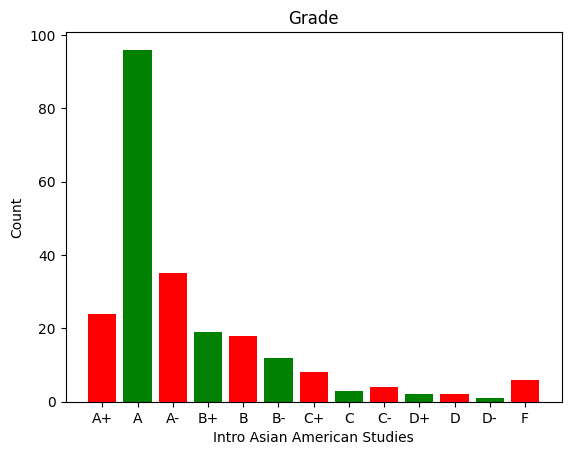

In [10]:
get_plot('Intro Asian American Studies', 2022, 'Spring')

Function that plots the gpa distribution for individual instructors of a given course in a given term.

In [11]:
def get_plot2(course_title, year, term):
        temp = grade_professor[(grade_professor['Course Title'] == course_title) & (grade_professor['Year'] == year) & (grade_professor['Term'] == term)]
        # x-coordinates of left sides of bars 
        left = temp['Primary Instructor']
        
        # heights of bars
        height = temp['GPA']

        # plotting a bar chart
        plt.bar(left, height,
                width = 0.5, color = ['red', 'green'])
        
        # naming the x-axis
        plt.xlabel(course_title)
        # naming the y-axis
        plt.ylabel('Count')
        # plot title
        plt.title('Grade')
        
        # function to show the plot
        return plt.show()

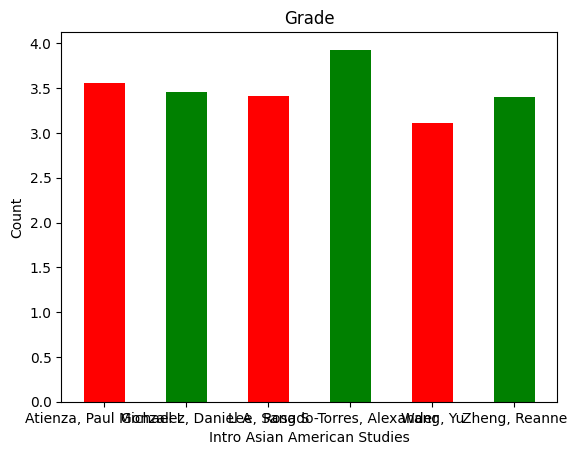

In [12]:
get_plot2('Intro Asian American Studies', 2022, 'Spring')

Function that creates heatmap for the each gpa distribution of each instructors of each courses in given time.

In [90]:
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.5)

def heatmap(course, year, term):
    sns.set_context({"figure.figsize":(8,8)})
    
    temp = grade[(grade["Course Title"] == course) & (grade["Year"] == year) & (grade["Term"] == term)]
    
    df = temp[["Primary Instructor", "A+",'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']]
    
    sns.heatmap(data=df[["A+",'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']], square=True,cmap="RdBu_r", annot=True, fmt="d", linewidths=0.3)  
    plt.xlabel("Grade")
    plt.ylabel("Primary Instructors")
    plt.title("Heatmap for " + course) 

    return sns


<module 'seaborn' from 'c:\\Users\\24854\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\seaborn\\__init__.py'>

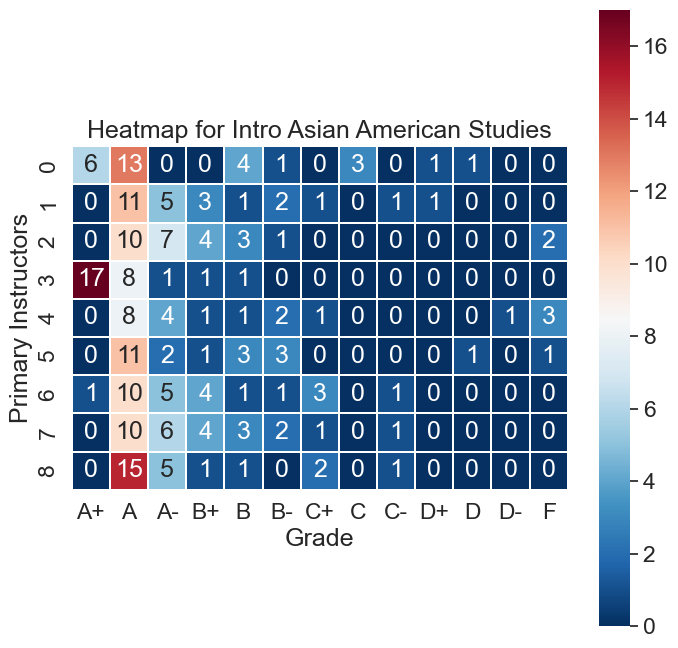

In [91]:
heatmap('Intro Asian American Studies', 2022, 'Spring')